# 6.4 Supervised Machine learning - Linear Regression

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning checks
#### 3. Explore data visually prior to regression analysis
#### 4. Hypothesis
#### 5. Data preparation for regression analysis
#### 6. Regression analysis
#### 7. Thoughts on how well the model performed on the test set

## 01. Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'C:\Users\Amy Yip\Desktop\Career Foundry Data Analytics\Achievement 6 Advanced Analytics and Dashboard Designs\07-05-2022 Melbourne Housing Analysis\02 Data'

In [4]:
# Import cleaned data

df_housing_clean = pd.read_pickle(os.path.join(path, 'Prepared Data', '6.1_melb_housing_clean_data_new.pkl'))

In [5]:
# Import subset data for Property Area Size

df_prop_size = pd.read_pickle(os.path.join(path, 'Prepared Data', '6.1_melb_housing_propertyareasize_subset.pkl'))

## 02. Data Cleaning Checks

Data has already been previously been cleaned, but a quick check will be conducted.

In [6]:
df_housing_clean.columns

Index(['Date Sold', 'Price', 'Year Built', 'Land Size', 'Property Area Size',
       'Property Type', 'Num of Rooms', 'Num of Bathrooms',
       'Num of Car Spaces', 'Distance to CBD', 'Suburb', 'Postcode',
       'Council Area', 'Council Area1', 'Latitude', 'Longitude', 'Region',
       'Property Vicinity Count'],
      dtype='object')

In [7]:
df_housing_clean.head()

,Date Sold,Price,Year Built,Land Size,Property Area Size,Property Type,Num of Rooms,Num of Bathrooms,Num of Car Spaces,Distance to CBD,Suburb,Postcode,Council Area,Council Area1,Latitude,Longitude,Region,Property Vicinity Count
1,3/12/2016,1480000.0,NaN,202.0,NaN,house/cottage/villa/terrace,2,1.0,1.0,2.5,Abbotsford,3067.0,Yarra City Council,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
2,4/02/2016,1035000.0,1900.0,156.0,79.0,house/cottage/villa/terrace,2,1.0,0.0,2.5,Abbotsford,3067.0,Yarra City Council,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
4,4/03/2017,1465000.0,1900.0,134.0,150.0,house/cottage/villa/terrace,3,2.0,0.0,2.5,Abbotsford,3067.0,Yarra City Council,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
5,4/03/2017,850000.0,NaN,94.0,NaN,house/cottage/villa/terrace,3,2.0,1.0,2.5,Abbotsford,3067.0,Yarra City Council,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
6,4/06/2016,1600000.0,2014.0,120.0,142.0,house/cottage/villa/terrace,4,1.0,2.0,2.5,Abbotsford,3067.0,Yarra City Council,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [8]:
df_housing_clean.shape

(15359, 18)

##### Missing Values

In [9]:
# Check for missing values

df_housing_clean.isnull().sum()

# No missing values to handle

Date Sold                     0
Price                         0
Year Built                 6420
Land Size                     0
Property Area Size         7369
Property Type                 0
Num of Rooms                  0
Num of Bathrooms              0
Num of Car Spaces             0
Distance to CBD               0
Suburb                        0
Postcode                      0
Council Area                  0
Council Area1                 0
Latitude                     18
Longitude                    18
Region                        0
Property Vicinity Count       0
dtype: int64

Note: Subset of clean Year Built and Land Size dataframe has already has created.

In [10]:
# Check for missing values in subset

df_prop_size.isnull().sum()

# No missing values to handle

Date Sold                    0
Price                        0
Year Built                 293
Land Size                    0
Property Area Size           0
Property Type                0
Num of Rooms                 0
Num of Bathrooms             0
Num of Car Spaces            0
Distance to CBD              0
Suburb                       0
Postcode                     0
Council Area                 0
Council Area1                0
Latitude                     7
Longitude                    7
Region                       0
Property Vicinity Count      0
dtype: int64

##### Duplicate check

In [11]:
dups = df_housing_clean.duplicated()

In [12]:
dups.shape # No dups

(15359,)

In [13]:
# Check duplicates in subset

dups1 = df_prop_size.duplicated()

In [14]:
dups1.shape # No dups

(7990,)

##### Extreme values checks

<AxesSubplot:xlabel='Price', ylabel='Count'>

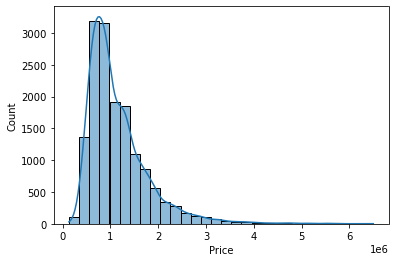

In [15]:
sns.histplot(df_housing_clean['Price'], bins = 30, kde = True) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [16]:
# Check the mean

df_housing_clean['Price'].mean()

1152276.462725438

In [17]:
# Check the median

df_housing_clean['Price'].median()

970000.0

In [18]:
# Check the max

df_housing_clean['Price'].max()

6500000.0

<AxesSubplot:xlabel='Price', ylabel='Count'>

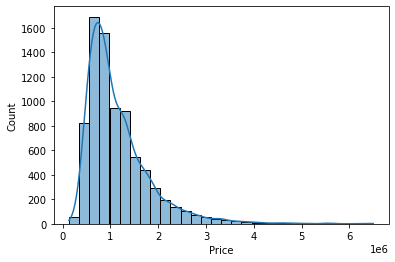

In [19]:
# Check extreme values in subset

sns.histplot(df_prop_size['Price'], bins = 30, kde = True) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

## 03. Explore data visually prior to regression analysis

### Below are variables whose relationships to be tested:

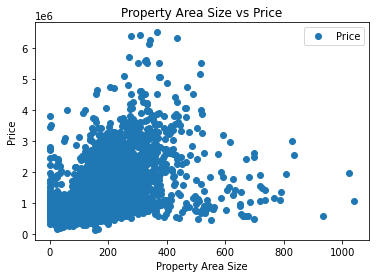

In [20]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
# 1. Property Area Size vs Price

df_prop_size.plot(x = 'Property Area Size', y='Price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Property Area Size vs Price')  
plt.xlabel('Property Area Size')  
plt.ylabel('Price')  
plt.show()

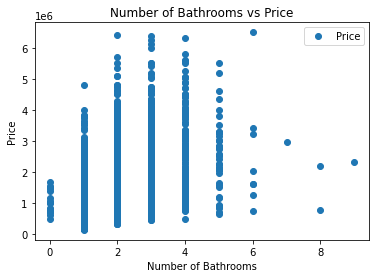

In [21]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
# 2. Number of Bathrooms vs Price

df_housing_clean.plot(x = 'Num of Bathrooms', y='Price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Number of Bathrooms vs Price')  
plt.xlabel('Number of Bathrooms')  
plt.ylabel('Price')  
plt.show()

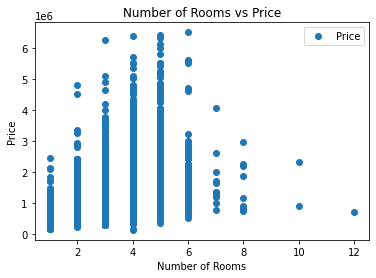

In [22]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
# 3. Number of Rooms vs Price

df_housing_clean.plot(x = 'Num of Rooms', y='Price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Number of Rooms vs Price')  
plt.xlabel('Number of Rooms')  
plt.ylabel('Price')  
plt.show()

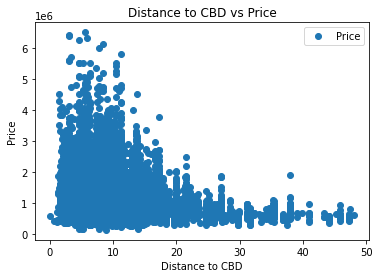

In [23]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
# 4. Distance to CBD vs Price

df_housing_clean.plot(x = 'Distance to CBD', y='Price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Distance to CBD vs Price')  
plt.xlabel('Distance to CBD')  
plt.ylabel('Price')  
plt.show()

## 04. Hypotheses

- The larger the property area size, the higher the price.
- The larger higher number of rooms in a property, the higher the price.
- The larger higher number of rooms in a property, the higher the price.
- The shorter the property distance to CBD, the higher the price.

## 05. Data preparation for regression analysis

#### Property Area Size vs Price:

In [24]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_prop_size['Property Area Size'].values.reshape(-1,1)
y = df_prop_size['Price'].values.reshape(-1,1)

In [25]:
X

array([[ 79.],
       [150.],
       [142.],
       ...,
       [104.],
       [120.],
       [103.]])

In [26]:
y

array([[1035000.],
       [1465000.],
       [1600000.],
       ...,
       [ 888000.],
       [ 705000.],
       [1020000.]])

In [27]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### Number Bathrooms vs Price

In [28]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X_2 = df_housing_clean['Num of Bathrooms'].values.reshape(-1,1)
y_2 = df_housing_clean['Price'].values.reshape(-1,1)

In [29]:
X_2

array([[1.],
       [1.],
       [2.],
       ...,
       [2.],
       [1.],
       [1.]])

In [30]:
y_2

array([[1480000.],
       [1035000.],
       [1465000.],
       ...,
       [ 888000.],
       [ 705000.],
       [1020000.]])

In [31]:
# Split data into a training set and a test set.

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

#### Number of Rooms vs Price

In [32]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X_3 = df_housing_clean['Num of Rooms'].values.reshape(-1,1)
y_3 = df_housing_clean['Price'].values.reshape(-1,1)

In [33]:
X_3

array([[2],
       [2],
       [3],
       ...,
       [2],
       [2],
       [2]], dtype=int64)

In [34]:
y_3

array([[1480000.],
       [1035000.],
       [1465000.],
       ...,
       [ 888000.],
       [ 705000.],
       [1020000.]])

In [35]:
# Split data into a training set and a test set.

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.3, random_state=0)

#### Distance to CBD vs Price

In [36]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X_4 = df_housing_clean['Distance to CBD'].values.reshape(-1,1)
y_4 = df_housing_clean['Price'].values.reshape(-1,1)

In [37]:
X_4

array([[2.5],
       [2.5],
       [2.5],
       ...,
       [6.3],
       [6.3],
       [6.3]])

In [38]:
y_4

array([[1480000.],
       [1035000.],
       [1465000.],
       ...,
       [ 888000.],
       [ 705000.],
       [1020000.]])

In [39]:
# Split data into a training set and a test set.

X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4, y_4, test_size=0.3, random_state=0)

## 04. Regression analysis

In [40]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [41]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [42]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

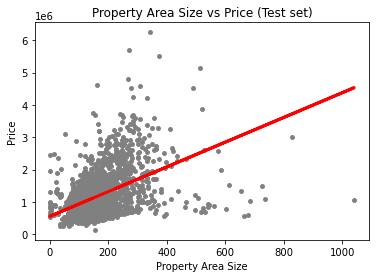

In [43]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Property Area Size vs Price (Test set)')
plot_test.xlabel('Property Area Size')
plot_test.ylabel('Price')
plot_test.show()

In [44]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [45]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[3826.09444661]]
Mean squared error:  346592493084.04675
R2 score:  0.19175715575841945


R2 score or R squared is a metric that tells you how well the model explains the variance in the data. 

The R2 score for the model is 0.19 which is low meaning the model is not a great fit to be used in this correlation.

In [46]:
y_predicted

array([[1102083.07623073],
       [1052343.84842476],
       [1167126.68182316],
       ...,
       [ 949039.29836619],
       [ 968169.77059926],
       [1423475.00974628]])

In [47]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,600000.0,1.102083e+06
1,735000.0,1.052344e+06
2,540000.0,1.167127e+06
3,1475000.0,9.146044e+05
4,825000.0,1.033213e+06
5,940000.0,9.643437e+05
6,1868000.0,1.385214e+06
7,826000.0,1.056170e+06
8,998000.0,1.136518e+06
9,780000.0,7.347780e+05


##### Compare how the regression fits the training set

In [48]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [49]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [50]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[3826.09444661]]
Mean squared error:  357001508280.4593
R2 score:  0.22938568181666064


The model fits the training set only slightly better than the test set (confirmed by an R2 score of 0.23). This means there is no overfit of the model. However, it also confirms that the relationship is not purely linear.

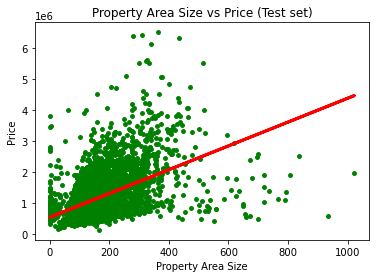

In [51]:
# Visualising the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Property Area Size vs Price (Test set)')
plot_test.xlabel('Property Area Size')
plot_test.ylabel('Price')
plot_test.show()

### Bonus: performance improvement after removing outliers

In [52]:
# Clean the extreme values from the "Price" variable observed.

df_test = df_prop_size[df_prop_size['Price'] <=4000000] 

In [53]:
# Clean the extreme values from the "Property Area Size" variable observed.

df_test1 = df_test[df_test['Property Area Size'] <=500] 

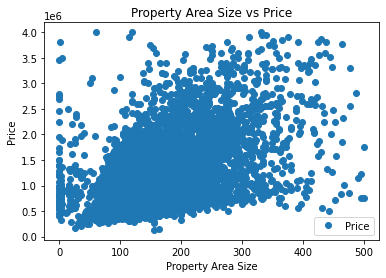

In [54]:
# See how the scatterplot looks without outliers.

df_test1.plot(x = 'Property Area Size', y='Price', style='o')  
plt.title('Property Area Size vs Price')  
plt.xlabel('Property Area Size')  
plt.ylabel('Price')  
plt.show()

In [55]:
# Reshape again.

X_1 = df_test1['Property Area Size'].values.reshape(-1,1)
y_1 = df_test1['Price'].values.reshape(-1,1)

In [56]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.3, random_state=0)

In [57]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_1, y_train_1)

LinearRegression()

In [58]:
# Predict.

y_predicted_1 = regression.predict(X_test_1)

In [59]:
rmse = mean_squared_error(y_test_1, y_predicted_1)
r2 = r2_score(y_test_1, y_predicted_1)

In [60]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[4464.12741469]]
Mean squared error:  275219392984.8855
R2 score:  0.2667220451367164


R2 score has only slightly improved which means linear regression is not the correct one for modelling the relationship between property area size and price.

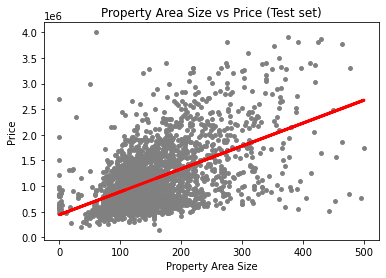

In [61]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_1, y_test_1, color='gray', s = 15)
plot_test.plot(X_train_1, regression.predict(X_train_1), color='red', linewidth =3)
plot_test.title('Property Area Size vs Price (Test set)')
plot_test.xlabel('Property Area Size')
plot_test.ylabel('Price')
plot_test.show()

#### Number of Bathrooms vs Price

In [62]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [63]:
# Fit the regression object onto the training set.

regression.fit(X_train_2, y_train_2)

LinearRegression()

In [64]:
# Predict the values of y_2 using X_2.

y_predicted_2 = regression.predict(X_test_2)

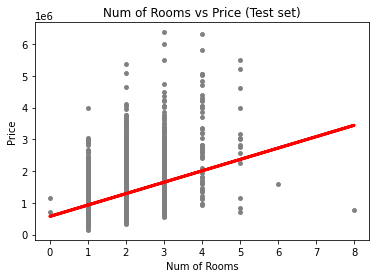

In [65]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Num of Rooms vs Price (Test set)')
plot_test.xlabel('Num of Rooms')
plot_test.ylabel('Price')
plot_test.show()

In [66]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test_2, y_predicted_2) # This is the mean squared error
r2 = r2_score(y_test_2, y_predicted_2) # This is the R2 score. 

In [67]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[358840.01441755]]
Mean squared error:  356064782025.9387
R2 score:  0.17900741163378087


R2 score or R squared is a metric that tells you how well the model explains the variance in the data. 

The R2 score for the model is 0.18 which is low meaning the model is not a great fit to be used in this correlation.

In [68]:
y_predicted_2

array([[ 928735.57628838],
       [ 928735.57628838],
       [ 928735.57628838],
       ...,
       [ 928735.57628838],
       [1287575.59070593],
       [ 928735.57628838]])

In [69]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,990000.0,9.287356e+05
1,650000.0,9.287356e+05
2,434500.0,9.287356e+05
3,959000.0,1.287576e+06
4,540000.0,1.287576e+06
5,1602500.0,9.287356e+05
6,2300000.0,1.287576e+06
7,532000.0,1.287576e+06
8,850000.0,9.287356e+05
9,1170000.0,1.287576e+06


##### Compare how the regression fits the training set

In [70]:
# Predict.

y_predicted_train_2 = regression.predict(X_train_2) # This is predicting X_train!

In [71]:
rmse = mean_squared_error(y_train_2, y_predicted_train_2)
r2 = r2_score(y_train_2, y_predicted_train_2)

In [72]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[358840.01441755]]
Mean squared error:  344481018409.7999
R2 score:  0.15825037155777888


The model fits the training set only slightly better than the test set (confirmed by an R2 score of 0.16). This means there is no overfit of the model. However, it also confirms that the relationship is not purely linear.

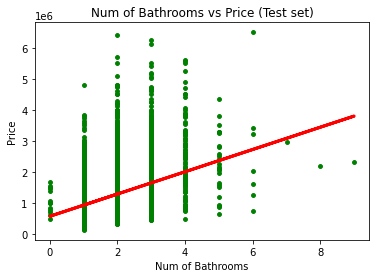

In [73]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train_2, y_train_2, color='green', s = 15)
plot_test.plot(X_train_2, y_predicted_train_2, color='red', linewidth =3)
plot_test.title('Num of Bathrooms vs Price (Test set)')
plot_test.xlabel('Num of Bathrooms')
plot_test.ylabel('Price')
plot_test.show()

#### Number of Rooms vs Price

In [74]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [75]:
# Fit the regression object onto the training set.

regression.fit(X_train_3, y_train_3)

LinearRegression()

In [76]:
# Predict the values of y_3 using X_3.

y_predicted_3 = regression.predict(X_test_3)

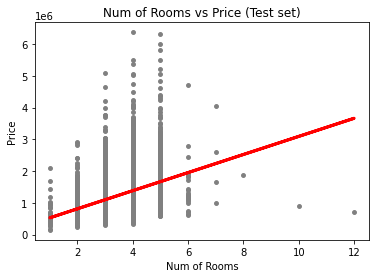

In [77]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test_3, y_test_3, color='gray', s = 15)
plot_test.plot(X_test_3, y_predicted_3, color='red', linewidth =3)
plot_test.title('Num of Rooms vs Price (Test set)')
plot_test.xlabel('Num of Rooms')
plot_test.ylabel('Price')
plot_test.show()

In [78]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test_3, y_predicted_3) # This is the mean squared error
r2 = r2_score(y_test_3, y_predicted_3) # This is the R2 score. 

In [79]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[285003.80938199]]
Mean squared error:  373912212659.513
R2 score:  0.13785588805940707


R2 score or R squared is a metric that tells you how well the model explains the variance in the data. 

The R2 score for the model is 0.14 which is low meaning the model is not a great fit to be used in this correlation.

In [80]:
y_predicted_3

array([[ 810976.40695786],
       [ 810976.40695786],
       [ 810976.40695786],
       ...,
       [ 810976.40695786],
       [1095980.21633985],
       [ 810976.40695786]])

In [81]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test_3.flatten(), 'Predicted': y_predicted_3.flatten()})
data.head(30)

,Actual,Predicted
0,990000.0,8.109764e+05
1,650000.0,8.109764e+05
2,434500.0,8.109764e+05
3,959000.0,1.095980e+06
4,540000.0,1.380984e+06
5,1602500.0,1.095980e+06
6,2300000.0,1.095980e+06
7,532000.0,8.109764e+05
8,850000.0,8.109764e+05
9,1170000.0,1.380984e+06


##### Compare how the regression fits the training set

In [82]:
# Predict.

y_predicted_train_3 = regression.predict(X_train_3) # This is predicting X_train!

In [83]:
rmse = mean_squared_error(y_train_3, y_predicted_train_3)
r2 = r2_score(y_train_3, y_predicted_train_3)

In [84]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[285003.80938199]]
Mean squared error:  348381211732.57745
R2 score:  0.14872013301094744


The model fits the training set only slightly better than the test set (confirmed by an R2 score of 0.14). This means there is no overfit of the model. However, it also confirms that the relationship is not purely linear.

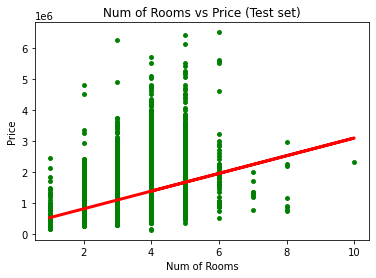

In [85]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train_3, y_train_3, color='green', s = 15)
plot_test.plot(X_train_3, y_predicted_train_3, color='red', linewidth =3)
plot_test.title('Num of Rooms vs Price (Test set)')
plot_test.xlabel('Num of Rooms')
plot_test.ylabel('Price')
plot_test.show()

#### Distance to CBD vs Price

In [117]:
df_housing_clean.dropna(inplace=True)

In [118]:
X_4e = df_housing_clean['Distance to CBD']
y_4e = df_housing_clean['Price']

X_4exp = np.array(X_4e)
y_4exp = np.array(y_4e)

# X_4 = df_housing_clean['Distance to CBD'].values.reshape(-1,1)
# y_4 = df_housing_clean['Price'].values.reshape(-1,1)

In [119]:
X_4exp

array([2.5, 2.5, 2.5, ..., 6.3, 6.3, 6.3])

In [120]:
y_4exp

array([1035000., 1465000., 1600000., ...,  888000.,  705000., 1020000.])

In [121]:
# Exponential Regression
np.polyfit(np.log(X_4exp), y_4exp, 1)

C:\Users\AMYYIP~1\AppData\Local\Temp/ipykernel_8684/3654609468.py:2: RuntimeWarning: divide by zero encountered in log
  np.polyfit(np.log(X_4exp), y_4exp, 1)


LinAlgError: SVD did not converge in Linear Least Squares

In [86]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [87]:
# Fit the regression object onto the training set.

regression.fit(X_train_4, y_train_4)

LinearRegression()

In [88]:
# Predict the values of y using X.

y_predicted_4 = regression.predict(X_test_4)

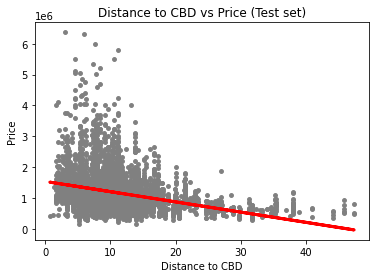

In [89]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test_4, y_test_4, color='gray', s = 15)
plot_test.plot(X_test_4, y_predicted_4, color='red', linewidth =3)
plot_test.title('Distance to CBD vs Price (Test set)')
plot_test.xlabel('Distance to CBD')
plot_test.ylabel('Price')
plot_test.show()

In [90]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test_4, y_predicted_4) # This is the mean squared error
r2 = r2_score(y_test_4, y_predicted_4) # This is the R2 score. 

In [91]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-33122.64119852]]
Mean squared error:  383520060560.42847
R2 score:  0.1157026948345099


R2 score or R squared is a metric that tells you how well the model explains the variance in the data. 

The R2 score for the model is 0.11 which is low meaning the model is not a great fit to be used in this correlation.

In [92]:
y_predicted

array([[1102083.07623073],
       [1052343.84842476],
       [1167126.68182316],
       ...,
       [ 949039.29836619],
       [ 968169.77059926],
       [1423475.00974628]])

In [93]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test_4.flatten(), 'Predicted': y_predicted_4.flatten()})
data.head(30)

,Actual,Predicted
0,990000.0,1.423001e+06
1,650000.0,1.167957e+06
2,434500.0,1.108336e+06
3,959000.0,1.406440e+06
4,540000.0,8.566039e+05
5,1602500.0,1.280574e+06
6,2300000.0,1.449499e+06
7,532000.0,1.247451e+06
8,850000.0,1.370005e+06
9,1170000.0,1.283886e+06


##### Compare how the regression fits the training set

In [94]:
# Predict.

y_predicted_train_4 = regression.predict(X_train_4) # This is predicting X_train!

In [95]:
rmse = mean_squared_error(y_train_4, y_predicted_train_4)
r2 = r2_score(y_train_4, y_predicted_train_4)

In [96]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-33122.64119852]]
Mean squared error:  362599370967.4917
R2 score:  0.11397763744945344


The model fits the training set only slightly better than the test set (confirmed by an R2 score of 0.11). This means there is no overfit of the model. However, it also confirms that the relationship is not purely linear.

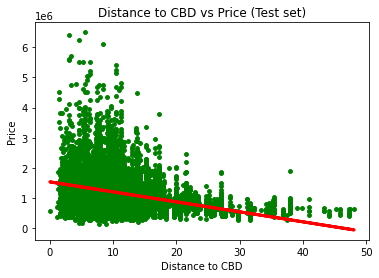

In [97]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train_4, y_train_4, color='green', s = 15)
plot_test.plot(X_train_4, y_predicted_train_4, color='red', linewidth =3)
plot_test.title('Distance to CBD vs Price (Test set)')
plot_test.xlabel('Distance to CBD')
plot_test.ylabel('Price')
plot_test.show()

## 05. Thoughts on how well the model performed on the test set

##### Recap Hypotheses:
- The larger the property area size, the higher the price.
- The larger higher number of bathrooms in a property, the higher the price.
- The larger higher number of rooms in a property, the higher the price.
- The shorter the property distance to CBD, the higher the price.

From the linear regression analysis, it can be confirmed that the model is not quite accurate as observed from the low r squared values across the relationships explored in this notebook. This means the hypotheses are only partially true. There are still a lot of variances in the data that cannot be explained by the linear relationship between the variables. 

However, property area size, number of bathrooms, number of rooms, and distance to CBD are still important factors in price formation. It is just one variable alone is not sufficient for pricing prediction. Property pricing are affected by many factors, not just one, therefore multiple variables regression is most likely to be more suitable for modelling this analysis.
I will need to explore multi-variable regression in order to accurately predict pricing.

One thing to note is, there is sampling bias in the data set. In reality, there are not many properties that have large number of bathrooms and rooms for sale or available in the market, hence there are fewer data points for properties that have large bathroom and room numbers. As a result, there are not enough data samples covering these scenarios for us to accurately to make inferences and predictions on.